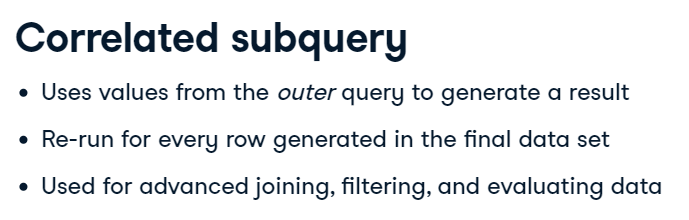
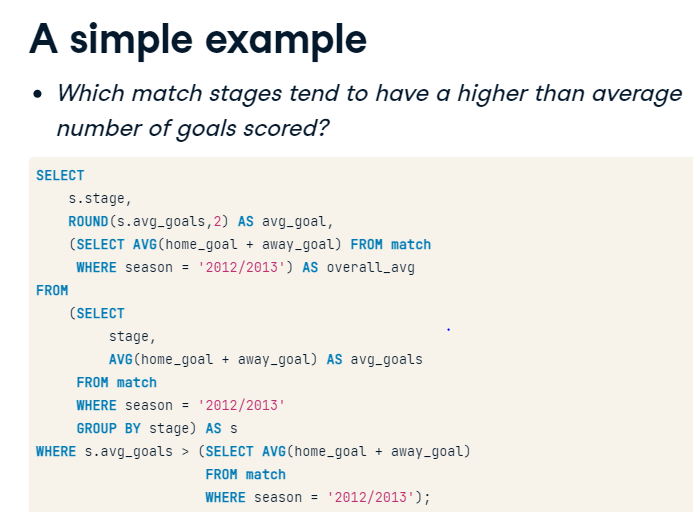
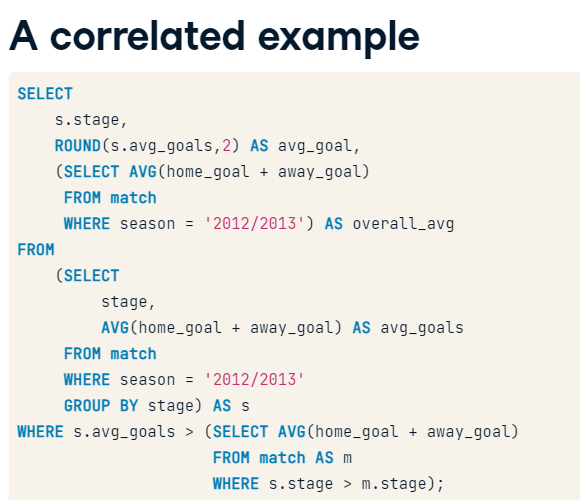
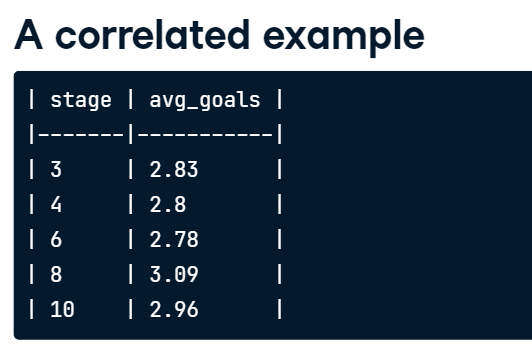
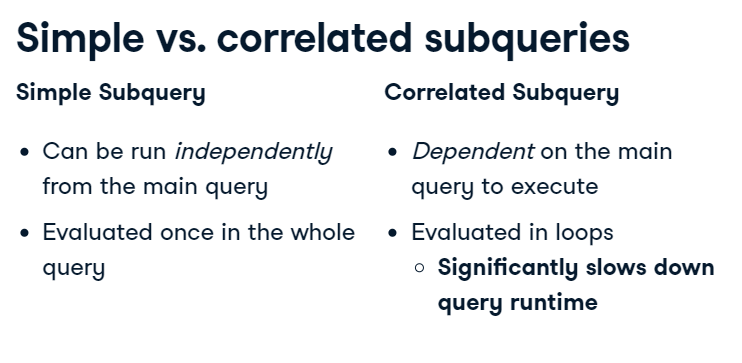
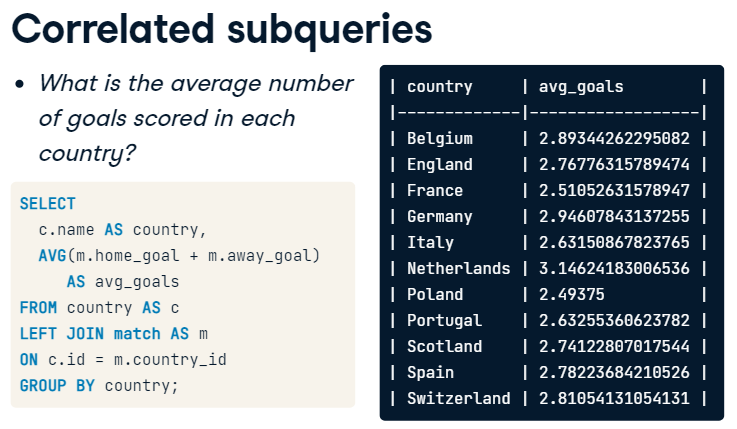
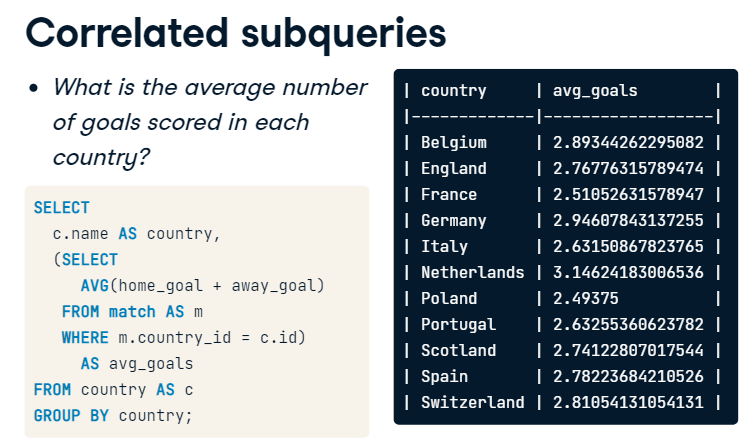

#### Basic Correlated Subqueries
Correlated subqueries are subqueries that reference one or more columns in the main query. Correlated subqueries depend on information in the main query to run, and thus, cannot be executed on their own.

Correlated subqueries are evaluated in SQL once per row of data retrieved -- a process that takes a lot more computing power and time than a simple subquery.

In this exercise, you will practice using correlated subqueries to examine matches with scores that are extreme outliers for each country -- above 3 times the average score!

- Select the country_id, date, home_goal, and away_goal columns in the main query.
- Complete the AVG value in the subquery.
- Complete the subquery column references, so that country_id is matched in the main and subquery.

```sql
SELECT 
	-- Select country ID, date, home, and away goals from match
	main.country_id,
    main.date,
    main.home_goal,
    main.away_goal
FROM match AS main
WHERE 
	-- Filter the main query by the subquery
	(home_goal + away_goal) > 
        (SELECT AVG((sub.home_goal + sub.away_goal) * 3)
         FROM match AS sub
         -- Join the main query to the subquery in WHERE
         WHERE main.country_id = sub.country_id);
```
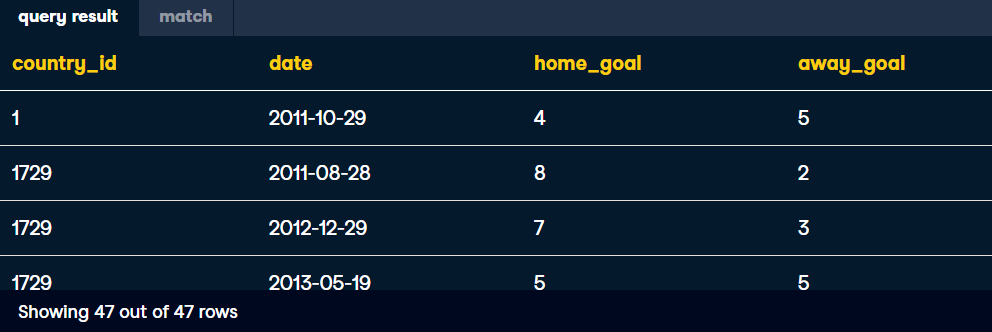

#### Correlated subquery with multiple conditions
Correlated subqueries are useful for matching data across multiple columns. In the previous exercise, you generated a list of matches with extremely high scores for each country. In this exercise, you're going to add an additional column for matching to answer the question -- what was the highest scoring match for each country, in each season?

*Note: this query may take a while to load.


- Select the country_id, date, home_goal, and away_goal columns in the main query.
- Complete the subquery: Select the matches with the highest number of total goals.
- Match the subquery to the main query using country_id and season.
- Fill in the correct logical operator so that total goals equals the max goals recorded in the subquery.

```sql
SELECT 
	-- Select country ID, date, home, and away goals from match
	main.country_id,
    main.date,
    main.home_goal,
    main.away_goal
FROM match AS main
WHERE 
	-- Filter for matches with the highest number of goals scored
	(home_goal + away_goal) =
        (SELECT MAX(sub.home_goal + sub.away_goal)
         FROM match AS sub
         WHERE main.country_id = sub.country_id
               AND main.season = sub.season);
```
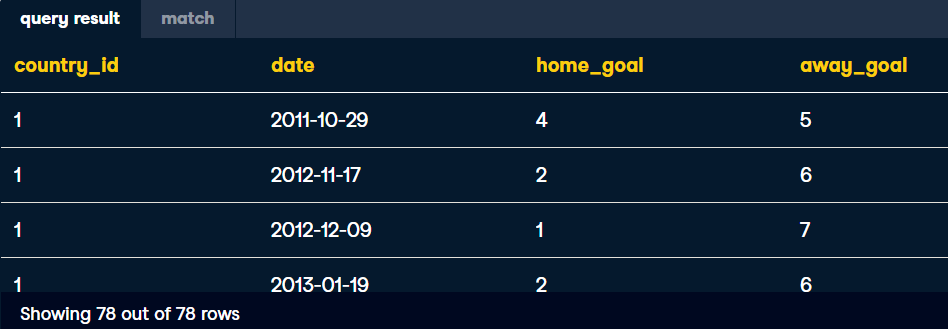
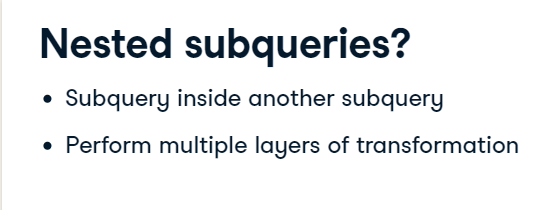
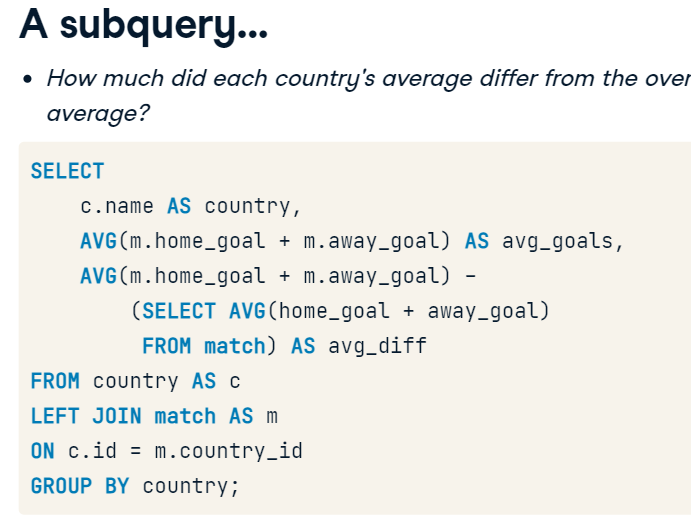
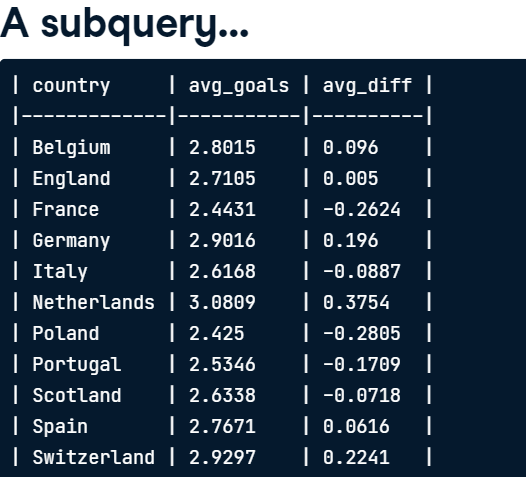
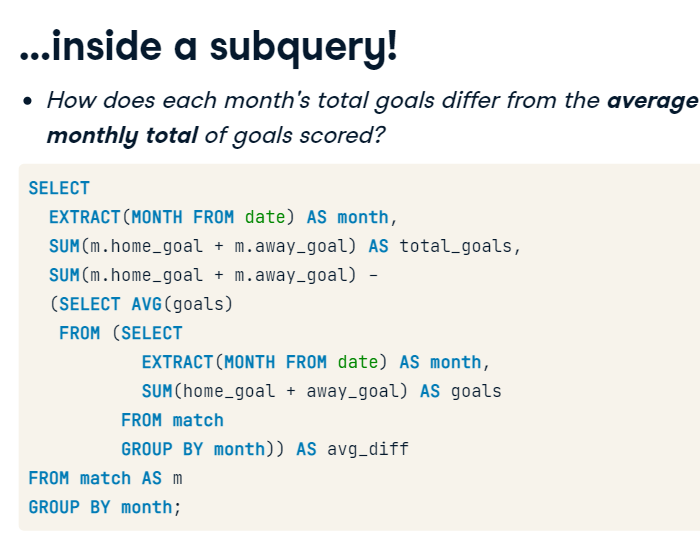
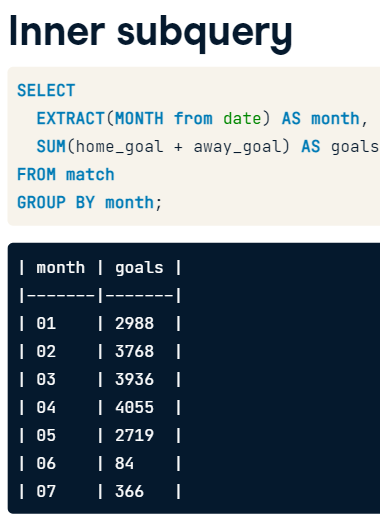
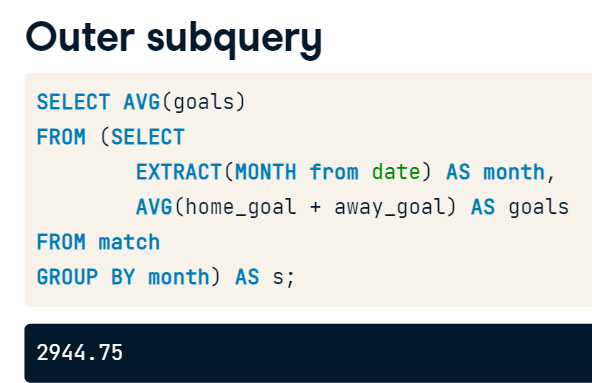
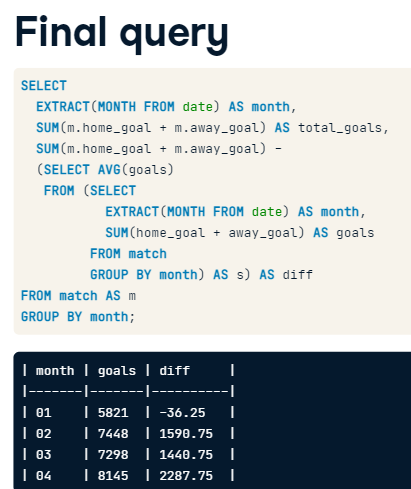
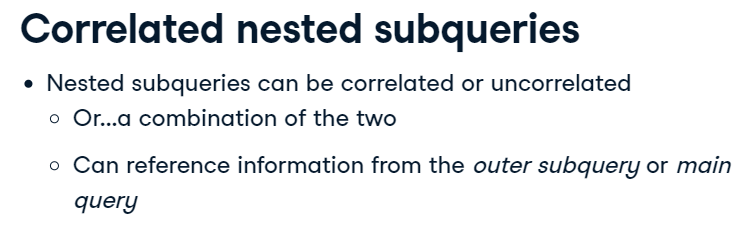
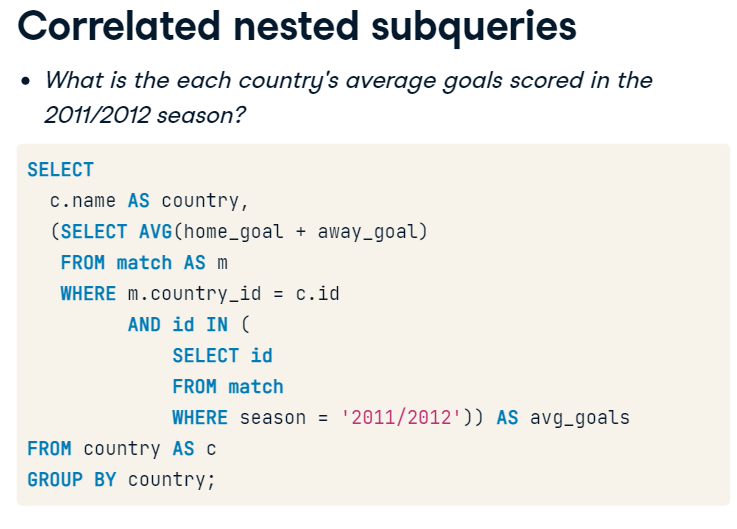
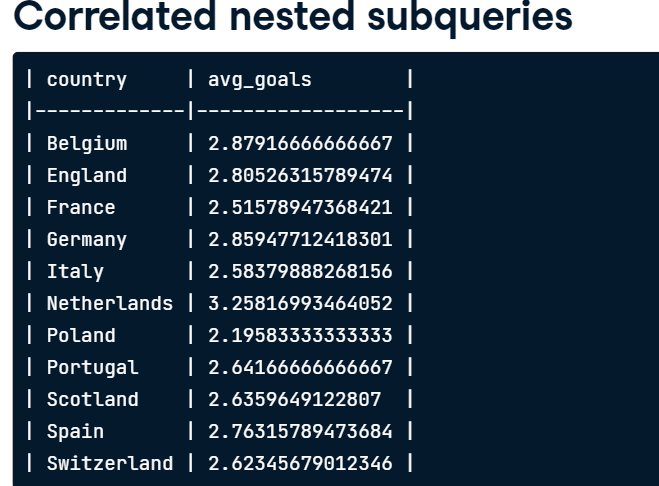
#### Nested simple subqueries
Nested subqueries can be either simple or correlated.

Just like an unnested subquery, a nested subquery's components can be executed independently of the outer query, while a correlated subquery requires both the outer and inner subquery to run and produce results.

In this exercise, you will practice creating a nested subquery to examine the highest total number of goals in each season, overall, and during July across all seasons.


- Complete the main query to select the season and the max total goals in a match for each season. Name this max_goals.
- Complete the first simple subquery to select the max total goals in a match across all seasons. Name this overall_max_goals.
- Complete the nested subquery to select the maximum total goals in a match played in July across all seasons.
- Select the maximum total goals in the outer subquery. Name this entire subquery july_max_goals.


```sql
SELECT 
	-- Select the season and max goals scored in a match
	season,
    MAX(home_goal + away_goal) AS max_goals,
    -- Select the overall max goals scored in a match
   (SELECT MAX(home_goal + away_goal) FROM match) AS overall_max_goals,
    -- Select the max number of goals scored in any match in July
   (SELECT MAX(home_goal + away_goal) 
        FROM match
        WHERE id IN (
              SELECT id FROM match WHERE EXTRACT(MONTH FROM date) = 07)) AS july_max_goals
FROM match
GROUP BY season;
```

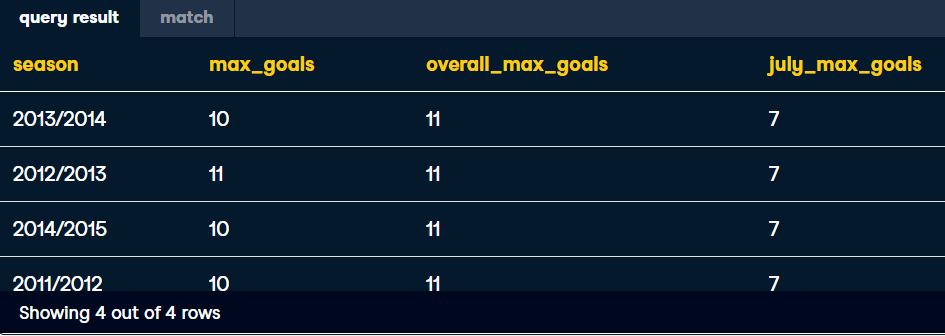


#### Nest a subquery in FROM
What's the average number of matches per season where a team scored 5 or more goals? How does this differ by country?

Let's use a nested, correlated subquery to perform this operation. In the real world, you will probably find that nesting multiple subqueries is a task you don't have to perform often. In some cases, however, you may find yourself struggling to properly group by the column you want, or to calculate information requiring multiple mathematical transformations (i.e., an AVG of a COUNT).

Nesting subqueries and performing your transformations one step at a time, adding it to a subquery, and then performing the next set of transformations is often the easiest way to yield accurate information about your data. Let's get to it!

- Generate a list of matches where at least one team scored 5 or more goals.

```sql
-- Select matches where a team scored 5+ goals
SELECT
	country_id,
    season,
	id
FROM match
WHERE home_goal >=5 OR away_goal >=5;
```
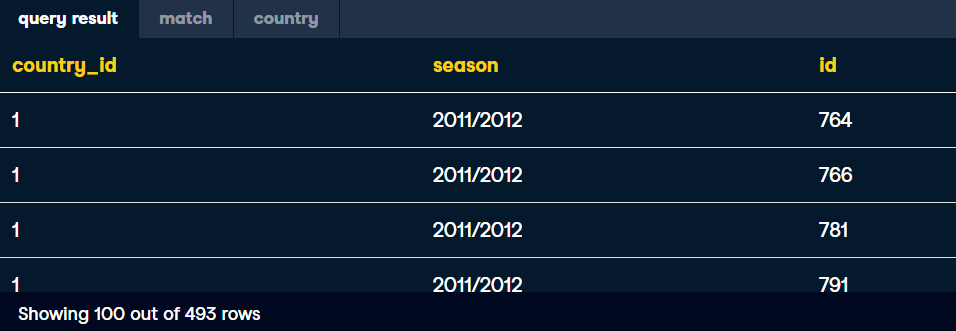

- Turn the query from the previous step into a subquery in the FROM statement.
- COUNT the match ids generated in the previous step, and group the query by country_id and season.

```sql
-- Count match ids
SELECT
    country_id,
    season,
    COUNT(id) AS matches
-- Set up and alias the subquery
FROM (
	SELECT
    	country_id,
    	season,
    	id
	FROM match
	WHERE home_goal >= 5 OR away_goal >= 5) AS subquery
-- Group by country_id and season
GROUP BY country_id, season;
```
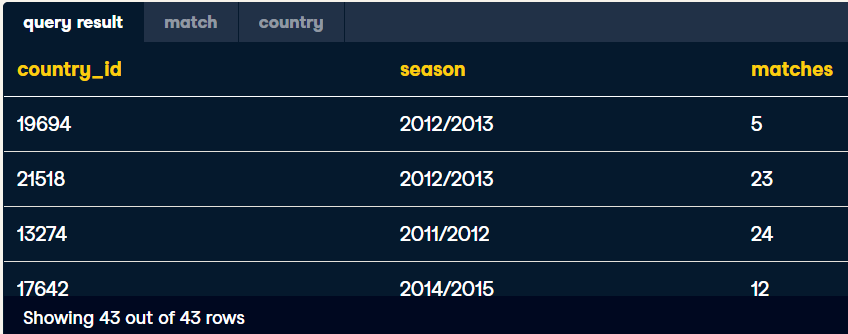
- Finally, declare the same query from step 2 as a subquery in FROM with the alias outer_s.
- Left join it to the country table using the outer query's country_id column.
- Calculate an AVG of high scoring matches per country in the main query.

```sql
SELECT
	c.name AS country,
    -- Calculate the average matches per season
    AVG(outer_s.matches) AS avg_seasonal_high_scores
FROM country AS c
-- Left join outer_s to country
LEFT JOIN (
  SELECT country_id, season,
         COUNT(id) AS matches
  FROM (
    SELECT country_id, season, id
	FROM match
	WHERE home_goal >= 5 OR away_goal >= 5) AS inner_s
  -- Close parentheses and alias the subquery
  GROUP BY country_id, season) AS outer_s
ON c.id = outer_s.country_id
GROUP BY country;
```
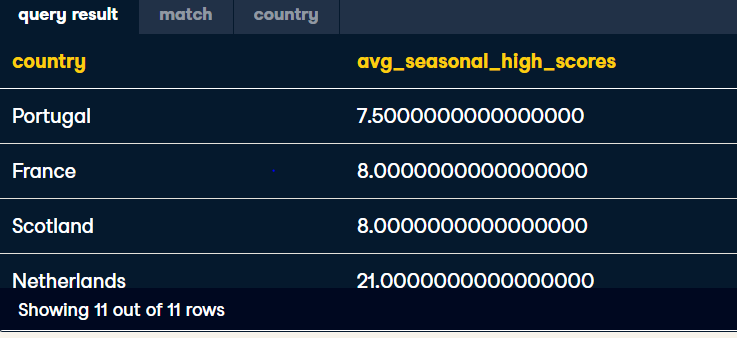
